In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import math
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Exploratoty Data Analysis

### Problem Statament

###### Jamboree Institute helps students take addmissions abraod for GMAT, GRE or SAT. They are looking to build a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

###### So we are basically looking for factors that helps in addmission process, understand them to build a realtionship which can give the candidates a likehood for their chances of being selected.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.shape

(500, 9)

###### Dataset has 9 features and 500 records, all being numerical in datatype. Serial No. is a redundant feature so we drop this feature.

In [5]:
df.drop(columns = 'Serial No.',inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### Statistical Summary

In [6]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### Let's understannd our features better

GRE Score         : Max marks - 340
TOEFL Score       : Max marks - 120
University Rating : Out of 5
SOP               : Out of 5
LOR               : Out of 5
CGPA              : Out of 10
Research          : Flag(0 or 1)
Chance of Admit   : Probability (0-1)

In [7]:
## Checking for the missing values.
missing_percentage = df.isnull().mean() * 100
missing_percentage

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

There are no missing values across all columns.

## Univariate Analysis

### 1. Gre Score

<Figure size 576x360 with 0 Axes>

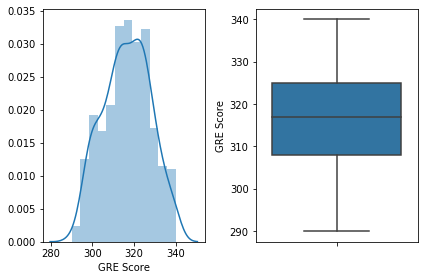

In [8]:
plt.figure(figsize= (8,5))
fig, ax = plt.subplots(1,2)
sns.distplot(df['GRE Score'], ax = ax[0])
sns.boxplot(y = df['GRE Score'], ax = ax[1])
plt.tight_layout()
plt.show()

#### We dont see any outlier in the data as mean and median (50%) values are similar (at 316 GRE score).
#### We can check later if higher value of GRE score drives chances of admission or vice‐versa

### 2. TOEFL Score

<Figure size 576x360 with 0 Axes>

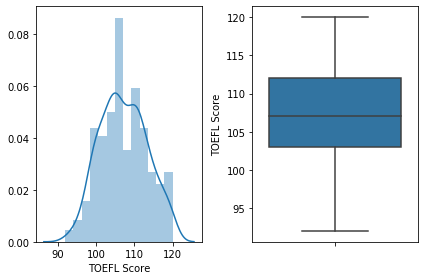

In [9]:
plt.figure(figsize= (8,5))
fig, ax = plt.subplots(1,2)
sns.distplot(df['TOEFL Score'], ax = ax[0])
sns.boxplot(y = df['TOEFL Score'], ax = ax[1])
plt.tight_layout()
plt.show()

#### We dont see any outlier in the data as mean and median (50%) values are similar (at 107 TOEFL score).
#### We can check later if higher value of TOEFL score drives chances of admission or vice‐versa

### 3. University rating range(0-5)

In [10]:
# This is a categorical feature with values in ranges (0-5)
df['University Rating'].value_counts(normalize=True)

3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: University Rating, dtype: float64

#### Most of the students, ~57% applies to Universities with Rating (2 and 3)
#### we can see more often university ranking of 3 is present in data.

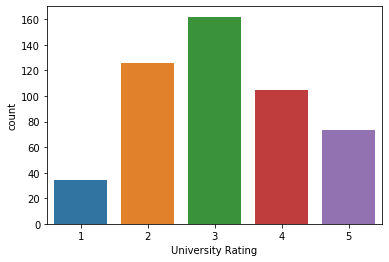

In [11]:
sns.countplot(df['University Rating'])

### 4. SOP

In [12]:
# This is a categorical feature with values in ranges (1-5)
df['SOP'].value_counts(normalize=True).sort_index()

1.0    0.012
1.5    0.050
2.0    0.086
2.5    0.128
3.0    0.160
3.5    0.176
4.0    0.178
4.5    0.126
5.0    0.084
Name: SOP, dtype: float64

#### 51% of students have SOP in range of (3-4).

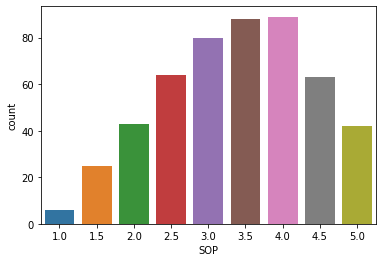

In [13]:
sns.countplot(df['SOP'])

#### More often, SOP value of 3‐4 is present. Lets see if higher SOP value drives chances of admissions

### 5. LOR

In [14]:
# This is a categorical feature with values in ranges (1-5)
df['LOR'].value_counts(normalize=True).sort_index()

1.0    0.002
1.5    0.022
2.0    0.092
2.5    0.100
3.0    0.198
3.5    0.172
4.0    0.188
4.5    0.126
5.0    0.100
Name: LOR, dtype: float64

#### ~56% of students have SOP in range of (3-4).

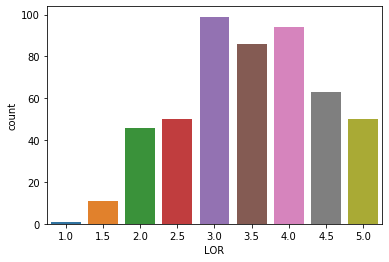

In [15]:
sns.countplot(df['LOR'])

#### More often, LOR value of 3‐4 is present. Lets see if higher LOR value drives chances of admissions

### 6. CGPA

<Figure size 720x720 with 0 Axes>

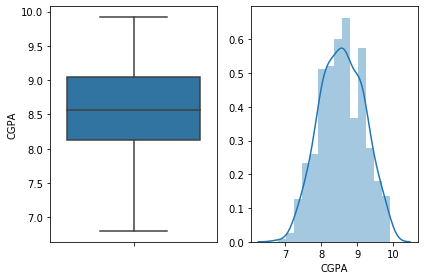

In [16]:
plt.figure(figsize=(10,10))
fig, ax =plt.subplots(1,2)
sns.boxplot(y = df['CGPA'], ax = ax[0])
sns.distplot(df['CGPA'], ax= ax[1])
plt.tight_layout()
plt.show()

#### We dont see any outlier in the data as mean and median (50%) values aresimilar (at 8.5 CGPA).
#### We can check later if higher value of CGPA score drives chances of admission or vice‐versa

### 7. Research

In [17]:
df['Research'].value_counts(normalize=True).sort_index()

0    0.44
1    0.56
Name: Research, dtype: float64

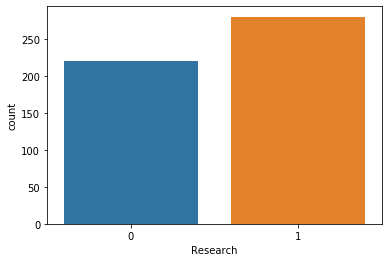

In [18]:
sns.countplot(df['Research'])

#### We can see if Research value of 1 drives more chances of admissions or not

### Bivariate analysis

In [19]:
cts_vars = ['GRE Score', 'TOEFL Score', 'CGPA']
ord_vars = ['University Rating', 'SOP', 'LOR', 'Research']

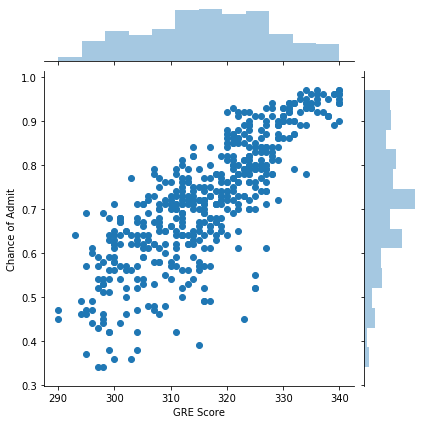

<Figure size 576x360 with 0 Axes>

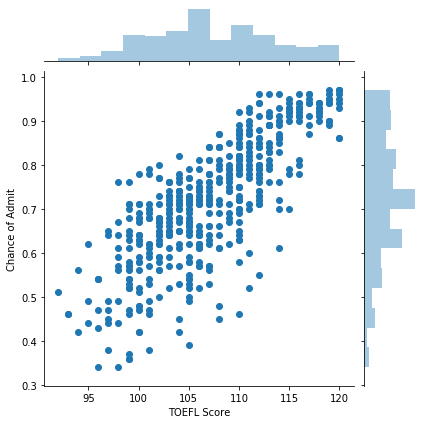

<Figure size 576x360 with 0 Axes>

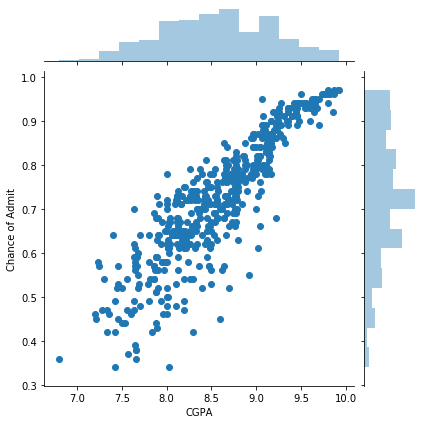

<Figure size 576x360 with 0 Axes>

In [20]:
for var in cts_vars:
    sns.jointplot(df[var], df['Chance of Admit'])
    plt.figure(figsize = (8,5))
    plt.show()

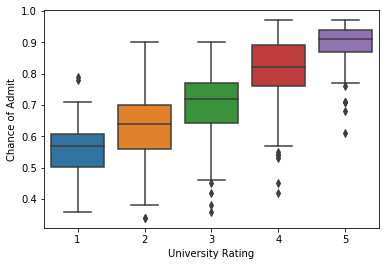

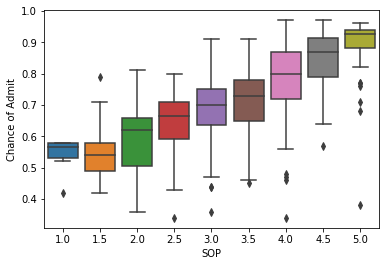

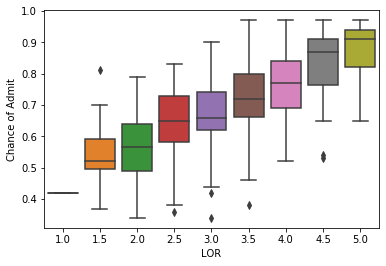

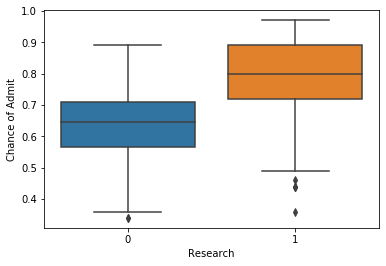

In [21]:
for var in ord_vars:
    sns.boxplot(df[var] , df['Chance of Admit'])
    plt.show()

### Conclusions from Bivariate Analysis

#### 1. Continuous features ('GRE Score,' 'TOEFL Score', 'CGPA') seems to have a linear relationship with y‐variable (Chance of Admit))
#### 2. Ordinal features ('University Rating', 'SOP', 'LOR', 'Research')‐ their median value seems to have an increasing relation with y‐variable
#### 3. There are few outliers in ordinal features‐ despite having higher values, the chances of admission is still low. It would be interesting to see what contributes these points.

## Relationship between Input Features

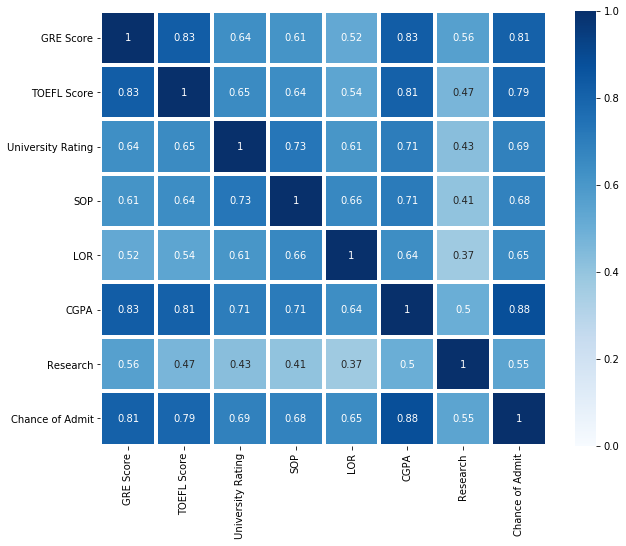

In [22]:
cormap = df.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(cormap, annot=True, linewidth=3, cmap='Blues', vmax=0, vmin=1)
plt.show()

#### We observe strong positive correlation among 'GRE Score', 'TOEFL Score' and 'CGPA'. We need to check how each affects our evaluation metrics
#### Also, high pearson correlation coefficient value between input features and y‐variable (chance of admission) indicates presence of linear relation between them.

### Some Discussions on the y-variable

In [23]:
df['Chance of Admit'].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit, dtype: float64

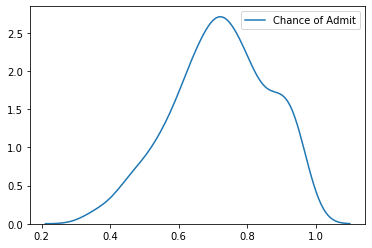

In [24]:
sns.kdeplot(df['Chance of Admit'])

#### Our Target variabe has mean probability of addmission as 72%, distribution is slighly left skewed.
#### Let's evaluate more and try to implement our Model.

## Model Building

In [25]:
# Split the data into input features (X) and target variable (y)
X = df.drop('Chance of Admit', axis=1)  
y = df['Chance of Admit']

#### Now we check for the assumptions of linear regression before we build our model

In [26]:
vif_scores = pd.DataFrame()
vif_scores["Feature"] = X.columns
vif_scores["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_scores["VIF"] = round(vif_scores["VIF"], 2)
vif_scores = vif_scores.sort_values(by = 'VIF', ascending = False)
print(vif_scores)

             Feature      VIF
0          GRE Score  1308.06
1        TOEFL Score  1215.95
5               CGPA   950.82
3                SOP    35.27
4                LOR    30.91
2  University Rating    20.93
6           Research     2.87


#### As we can see 'GRE Score', 'TOEFL Score' and 'CGPA' has got larger VIF values.

In [27]:
## To counter multicolinearity lets create a new feature.

max_gre_score = 340
max_toefl_score = 120
max_cgpa = 10

X['Agg Score'] = round(((X['GRE Score']/max_gre_score + X['TOEFL Score']/max_toefl_score + X['CGPA']/max_cgpa)/3)*100,2)
X

## This gives us a new feature which is basically a feature of aggregate scores derived from the 3 highly corelated features.
## and is out 100

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Agg Score
0,337,118,4,4.5,4.5,9.65,1,97.98
1,324,107,4,4.0,4.5,8.87,1,91.05
2,316,104,3,3.0,3.5,8.00,1,86.54
3,322,110,3,3.5,2.5,8.67,1,91.02
4,314,103,2,2.0,3.0,8.21,0,86.76
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,92.62
496,337,117,5,5.0,5.0,9.87,1,98.44
497,330,120,5,4.5,5.0,9.56,1,97.55
498,312,103,4,4.0,5.0,8.43,0,87.30


In [28]:
X['Agg Score'].describe()

count    500.000000
mean      89.390240
std        4.521954
min       78.750000
25%       86.260000
50%       88.975000
75%       92.672500
max       99.730000
Name: Agg Score, dtype: float64

In [29]:
## Let's drop the 3 highly corelated features and use Agg Score Feature.
X_cor_treatment = X.drop(columns = ['GRE Score', 'TOEFL Score', 'CGPA'], axis=1)  

In [30]:
## Now again calculating the VIF scores after our correction.

vif_scores = pd.DataFrame()
vif_scores["Feature"] = X_cor_treatment.columns
vif_scores["VIF"] = [variance_inflation_factor(X_cor_treatment.values, i) for i in range(X_cor_treatment.shape[1])]
vif_scores["VIF"] = round(vif_scores["VIF"], 2)
vif_scores = vif_scores.sort_values(by = 'VIF', ascending = False)
print(vif_scores)

             Feature    VIF
1                SOP  33.24
2                LOR  29.80
4          Agg Score  22.30
0  University Rating  19.74
3           Research   2.85


#### With Combining the correlated features, we have limited the multicolinearity to some extent.
#### Let's use this for our Model Building.

In [31]:
X_cor_treatment

,University Rating,SOP,LOR,Research,Agg Score
0,4,4.5,4.5,1,97.98
1,4,4.0,4.5,1,91.05
2,3,3.0,3.5,1,86.54
3,3,3.5,2.5,1,91.02
4,2,2.0,3.0,0,86.76
...,...,...,...,...,...
495,5,4.5,4.0,1,92.62
496,5,5.0,5.0,1,98.44
497,5,4.5,5.0,1,97.55
498,4,4.0,5.0,0,87.30


In [37]:
#### Perform feature scaling on the input features to avoid issues with different scales:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cor_treatment)

### Using Scaled features to build our Model

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

## Verifing the shapes :
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 5), (100, 5), (400,), (100,))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y , test_size = 0.3, ran
X_train.shape, X_test.shape, y_train.shape, y_test.shape

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [39]:
# create an instance of the LinearRegression class
Lin_reg_model = LinearRegression()

# This line fits the linear regression model to the training data. The fit() method is used to train the model 
# by finding the optimal coefficients for the linear equation that best fits the relationship between the features (X_train) 
# and the target variable (y_train).

Lin_reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# performance of the linear regression model on Training data
Lin_reg_model.score(X_train, y_train)

0.812351541157899

In [42]:
# performance of the linear regression model on Testing data
Lin_reg_model.score(X_test, y_test)

0.8045799074249784

In [45]:
# learned coefficients from the features.
Lin_reg_model.coef_

array([0.00325749, 0.00272315, 0.01865133, 0.01259964, 0.10401627])

In [46]:
y_hat = Lin_reg_model.predict(X_test)

In [48]:
# Writing the function for the adjusted Adj R2

def adj_r2(r2,n_samples,n_features):
    adjusted_r2 = 1 - (((1 - r2) * (n_samples - 1)) / (n_samples - n_features - 1))
    return adjusted_r2

In [51]:
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_hat))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_hat))
print("adjusted r2: %.4f" % adj_r2(r2_score(y_test, y_hat), X_test.shape[0], X_test.shape[1]))

Mean squared error: 0.0040
Coefficient of determination: 0.8046
adjusted r2: 0.7942


In [49]:
X_test.shape[0], X_test.shape[1]

(100, 5)